Using Colab cache for faster access to the 'brain-tumor-classification-mri' dataset.
Dataset imported successfully.
Resized dataset: 400 images, shape: 128x128
One-hot encoded labels (first 5):

   glioma_tumor  meningioma_tumor  no_tumor  pituitary_tumor
0         False             False      True            False
1         False             False      True            False
2         False             False      True            False
3         False             False      True            False
4         False             False      True            False


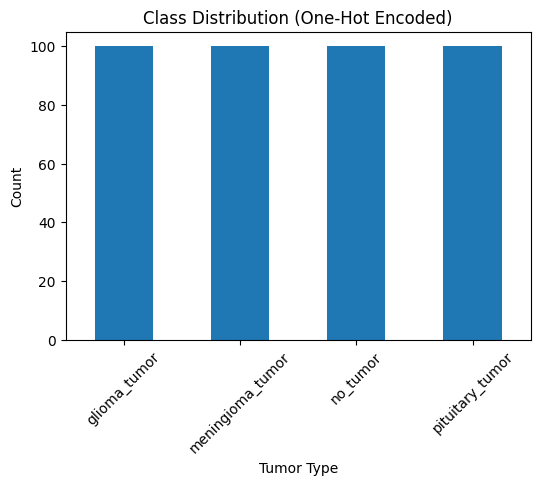

''

In [2]:
# ========================
# Dataset Import + One-Hot Encoding + Visualization
# ========================
import kagglehub
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# 1. Import dataset
dataset_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')
print("Dataset imported successfully.")

# 2. Define training path
train_dir = os.path.join(dataset_path, "Training")
classes = os.listdir(train_dir)

# 3. Resize images + collect labels
image_size = 128
X = []
y = []

for label in classes:
    folder = os.path.join(train_dir, label)
    for file in os.listdir(folder)[:100]:  # limit to 100 per class for demo
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        y.append(label)

print(f"Resized dataset: {len(X)} images, shape: {image_size}x{image_size}")

# 4. One-hot encoding with pandas
y_onehot_df = pd.get_dummies(y)

# 5. Show encoded labels
print("One-hot encoded labels (first 5):\n")
print(y_onehot_df.head())

# 6. Visualization of class distribution
plt.figure(figsize=(6,4))
y_onehot_df.sum().plot(kind="bar")
plt.title("Class Distribution (One-Hot Encoded)")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
""